<h2> Project 1 : General Exploratory Data Analysis (EDA)</h2>

<h5>STEP 1: Import Required Libraries</h5>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h5>STEP 2: Load Dataset</h5>

In [3]:
df = pd.read_csv("C:/Users/Student/Desktop/23KN1A0583/global_superstore_sample.csv")
df.head()

,Order ID,Product,Category,Region,Sales,Profit,Quantity,Discount,Order Date
0,1,Laptop,Office Supplies,East,4418.79,439.11,1,0.31,2022-01-01
1,2,Printer,Technology,South,2908.11,513.31,1,0.12,2022-01-04
2,3,Chair,Office Supplies,East,5197.15,-175.85,9,0.10,2022-01-07
3,4,Table,Technology,West,4043.53,487.42,9,0.25,2022-01-10
4,5,Table,Furniture,East,3182.10,405.10,8,0.05,2022-01-13


<h5>Step 3: Data Cleaning</h5>

In [4]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Detect and handle outliers using IQR method
numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Cleaned dataset shape:", df.shape)

Missing Values:
 Order ID      0
Product       0
Category      0
Region        0
Sales         0
Profit        0
Quantity      0
Discount      0
Order Date    0
dtype: int64
Cleaned dataset shape: (116, 9)


<h5>Step 4: Statistical Analysis</h5>

In [6]:
for col in numeric_cols:
    print(f"\n {col} stats:")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Std Dev:", df[col].std())
    print("Variance:", df[col].var())

# Correlation matrix
corr_matrix = df[numeric_cols].corr()
print("\n Correlation Matrix:\n", corr_matrix)


 Sales stats:
Mean: 2924.203448275862
Median: 2840.785
Std Dev: 895.5846592945069
Variance: 802071.881963658

 Profit stats:
Mean: 360.7610344827586
Median: 355.62
Std Dev: 178.72152393369248
Variance: 31941.383117181416

 Quantity stats:
Mean: 5.086206896551724
Median: 5.0
Std Dev: 2.659090938213877
Variance: 7.070764617691157

 Discount stats:
Mean: 0.20241379310344826
Median: 0.21
Std Dev: 0.10682468929455664
Variance: 0.011411514242878566

 Correlation Matrix:
              Sales    Profit  Quantity  Discount
Sales     1.000000  0.016994  0.053809  0.028248
Profit    0.016994  1.000000  0.050479 -0.184706
Quantity  0.053809  0.050479  1.000000 -0.040841
Discount  0.028248 -0.184706 -0.040841  1.000000


<h5> Step 5: Data Visualization</h5>

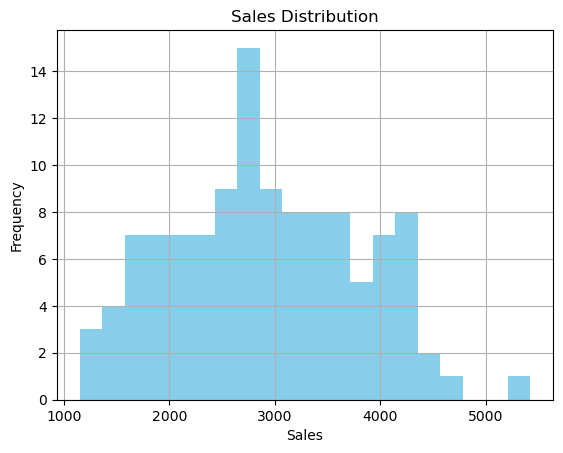

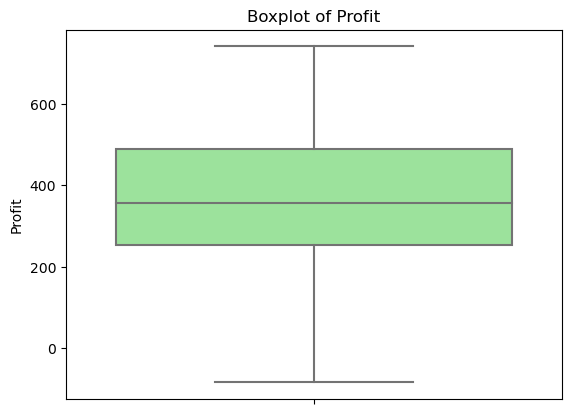

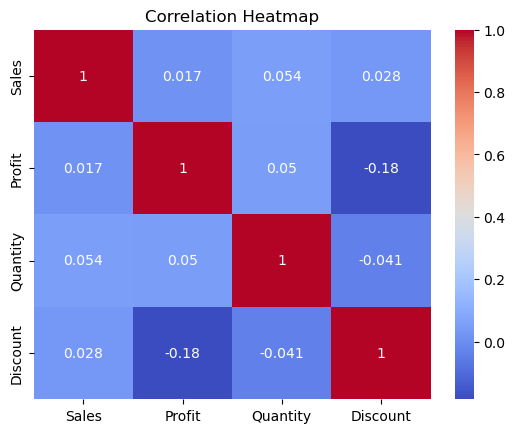

In [8]:
# Histogram - Distribution of Sales
df['Sales'].hist(bins=20, color='skyblue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Boxplot - Profit
sns.boxplot(y=df['Profit'], color='lightgreen')
plt.title("Boxplot of Profit")
plt.show()

# Heatmap - Correlation Matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<h2>Project 2 : Sales Performance Analysis </h2>

<h5>Step 1: Import Required Libraries </h5>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# For Predictive Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<h5>Step 2: Load and Explore the Dataset</h5>

In [13]:
df = pd.read_csv("C:/Users/Student/Desktop/23KN1A0583/sales_data.csv") 

# View basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Stats:\n", df.describe())

Shape: (100, 7)

Data Types:
 Product      object
Region       object
Sales       float64
Profit      float64
Discount    float64
Category     object
Date         object
dtype: object

Missing Values:
 Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

Summary Stats:
              Sales       Profit    Discount
count   100.000000   100.000000  100.000000
mean   5103.069000  1084.212900    0.261400
std    1432.379123   504.426922    0.157243
min    1017.240000     2.520000    0.010000
25%    4106.262500   753.465000    0.140000
50%    5009.815000  1054.645000    0.265000
75%    6151.955000  1453.137500    0.400000
max    9101.630000  2194.520000    0.500000


<h5> Step 3: Data Cleaning</h5>

In [17]:
# 1. Remove Duplicates
df.drop_duplicates(inplace=True)

# 2. Fill Missing Values
df['Sales'].fillna(df['Sales'].mean(), inplace=True)
df['Profit'].fillna(df['Profit'].mean(), inplace=True)
df['Discount'].fillna(df['Discount'].mean(), inplace=True)

# 3. Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

<h5>Step 4: Exploratory Data Analysis</h5>

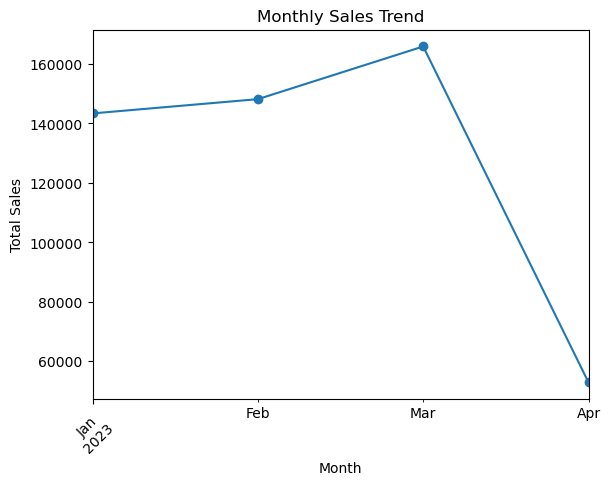

In [18]:
# A. Time Series Plot - Sales Trend Over Time
sales_over_time = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()
sales_over_time.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

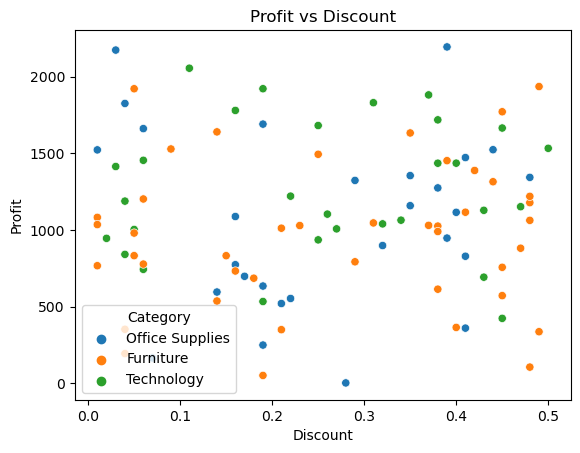

In [20]:
# B. Scatter Plot - Profit vs. Discount
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Profit vs Discount")
plt.show()

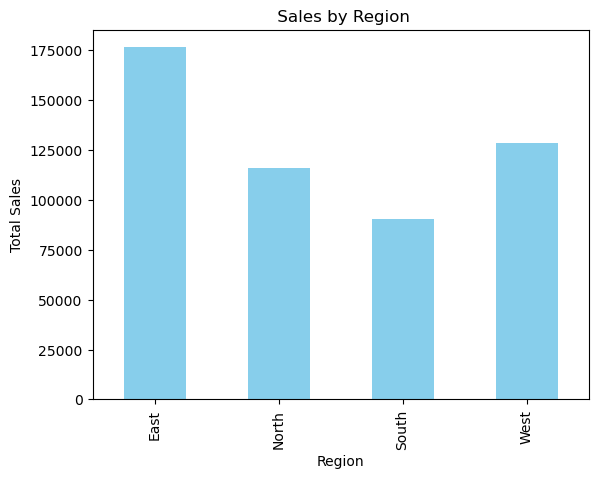

In [21]:
# C. Bar Plot - Sales by Region
df.groupby('Region')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title(" Sales by Region")
plt.ylabel("Total Sales")
plt.show()

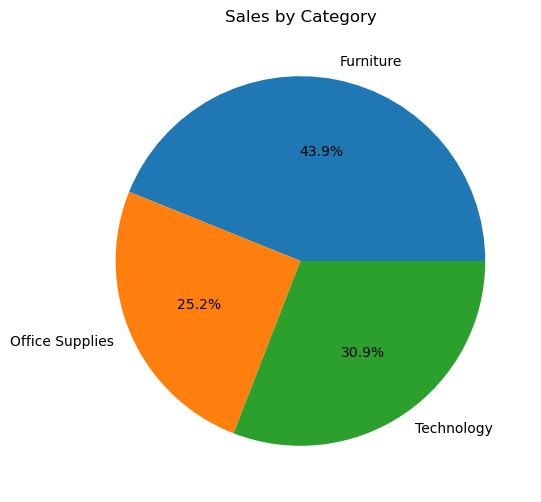

In [22]:
# D. Pie Chart - Sales by Category
df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Sales by Category")
plt.ylabel("")
plt.show()

<h5> Step 5: Predictive Modeling - Linear Regression</h5>

In [24]:
# Features and Target
X = df[['Profit', 'Discount']]
y = df['Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print(" Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.019435676036209992
 Mean Squared Error: 1994871.03476028
